---
                                            Московский Авиационный Институт  
                                      (Национальный Исследовательский Университет)  
        
                
                 
    Институт №8 «Информационные технологии и прикладная математика»  
    Кафедра 806 «Вычислительная математика и программирование» 
    Дисциплина: «Разработка ПО для высокопроизводительных систем»        
                



                                            Лабораторная работа по Pandas №2  
    
                                            
                                            
                                            
                                                                                Группа: М8О-103М-20  
                                                                                Студент: Никитина Анна Евгеньевна  
                                                                                Преподаватель: Поповкин Александр Викторович  
                                                                                
                                                                                
                                                                                
                                                     Москва, 2020  
                                                         
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1. Получить от объекта Series показатели описательной статистики

In [2]:
a=pd.Series([4, 7, -5, 3])
a.describe()

count    4.000000
mean     2.250000
std      5.123475
min     -5.000000
25%      1.000000
50%      3.500000
75%      4.750000
max      7.000000
dtype: float64

2. Узнать частоту уникальных элементов объекта Series (гистограмма)

<BarContainer object of 4 artists>

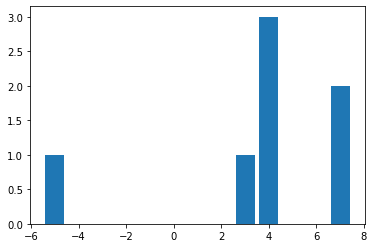

In [3]:
a=pd.Series([4, 7, -5, 3, 4, 4, 7])
freq=a.value_counts()
plt.bar(freq.index, freq.values)

3. Заменить все элементы объекта Series на "Other", кроме двух наиболее часто встречающихся

In [4]:
a=pd.Series([4, 7, -5, 3, 4, 4, 7])
print(a.value_counts())
b=a.copy()
b[~b.isin(b.value_counts().index[:2])]="Other"
a.name="old"
b.name="new"
pd.concat([a,b], axis=1)

 4    3
 7    2
-5    1
 3    1
dtype: int64


,old,new
0,4,4
1,7,7
2,-5,Other
3,3,Other
4,4,4
5,4,4
6,7,7


4. Создать объект Series в индексах дата каждый день 2019 года, в значениях случайное значение

In [75]:
data=pd.date_range(start = '2019-01-01', end = '2019-12-31')
a=pd.Series(np.random.rand(len(data)), index = data)
print(a)

2019-01-01    0.954944
2019-01-02    0.148625
2019-01-03    0.535573
2019-01-04    0.153284
2019-01-05    0.382269
                ...   
2019-12-27    0.985662
2019-12-28    0.127555
2019-12-29    0.308994
2019-12-30    0.923306
2019-12-31    0.710526
Freq: D, Length: 365, dtype: float64


Найти сумму всех вторников

In [74]:
vtornik=np.sum(a[a.index.weekday == 1])
print(vtornik)

AttributeError: 'RangeIndex' object has no attribute 'weekday'

Для каждого месяца найти среднее значение

In [7]:
srednee=a.resample('M').mean()
print(srednee)

2019-01-31    0.486518
2019-02-28    0.429709
2019-03-31    0.471264
2019-04-30    0.492948
2019-05-31    0.444393
2019-06-30    0.598744
2019-07-31    0.396798
2019-08-31    0.536913
2019-09-30    0.484891
2019-10-31    0.491351
2019-11-30    0.530153
2019-12-31    0.495439
Freq: M, dtype: float64


5. Преобразовать объект Series в DataFrame заданной формы (shape)

In [8]:
a=pd.Series([4, 7, -5, 3])
b=pd.DataFrame(a.values.reshape(2,2))
print(b)

   0  1
0  4  7
1 -5  3


6. Найти индексы объекта Series кратные 3

In [9]:
a=pd.Series([4, 7, -5, 3, 10, 4, 6, 8])
print(a[3::3])

3    3
6    6
dtype: int64


7. Получить данные по индексам объекта Series

In [10]:
a=pd.Series([4, 7, -5, 3, 10, 4, 6, 8])
ind=np.random.randint(0, len(a), size=4)
print(a[ind])

4    10
0     4
2    -5
5     4
dtype: int64


8. Объединить два объекта Series вертикально и горизонтально

In [13]:
a=pd.Series(["Lisa", "Lola", "Jack", "Fred", "Antony"], name="name")
b=pd.Series([1, 3, 5, 6, 2], name="fail")
print(pd.concat([a,b]))
print(pd.concat([a,b], axis=1))

0      Lisa
1      Lola
2      Jack
3      Fred
4    Antony
0         1
1         3
2         5
3         6
4         2
dtype: object
     name  fail
0    Lisa     1
1    Lola     3
2    Jack     5
3    Fred     6
4  Antony     2


9. Получить индексы объекта Series A, данные которых содержатся в объетке Series B

In [17]:
a=pd.Series([11, 9, 2, 7, 3])
b=pd.Series([1, 3, 5, 6, 2])
a[a.isin(b)].index

Int64Index([2, 4], dtype='int64')

10. Получить объект Series B, котоырй содержит элементы без повторений объекта A

In [21]:
a=pd.Series([11, 9, 2, 7, 3, 11, 2, 2, 7])
b=a.unique()
print(b)

[11  9  2  7  3]


11. Преобразовать каждый символ объекта Series в верхний регистр

In [41]:
a=pd.Series(["Lisa", "Lola", "Jack", "Fred", "Antony"])
b=a.str.upper()
print(b)

0      LISA
1      LOLA
2      JACK
3      FRED
4    ANTONY
dtype: object


12. Преобразовать данных Series в строку

In [34]:
a=pd.Series(["Lisa", "Lola", "Jack", "Fred", "Antony"])
b=a.str.cat(sep=" ")
print(b, type(b))

Lisa Lola Jack Fred Antony <class 'str'>


13. Рассчитать количество символов в объекте Series

In [48]:
a=pd.Series(["Lisa", "Lola", "Jack", "Fred", "Antony"])
b=a.str.len()
print(b) #колчиество символов одного элемента
print(np.sum(b)) #количество символов во всей серии

0    4
1    4
2    4
3    4
4    6
dtype: int64
22


14. Преобразовать в строковый тип

In [39]:
a=pd.Series([11, 9, 2, 7, 3, 11, 2, 2, 7])
b=a.map(lambda x: str(x))
print(b, type(b[0]))

0    11
1     9
2     2
3     7
4     3
5    11
6     2
7     2
8     7
dtype: object <class 'str'>


15. Найти разность между объектом Series и смещением объекта Series на n

In [49]:
n=3
a=pd.Series([11, 9, 2, 7, 3, 11, 2, 2, 7])
b=b.diff(periods = n)
print(b)

0    NaN
1    NaN
2    NaN
3    0.0
4    2.0
dtype: float64


16. Преобразовать разные форматы строк объекта Series в дату

In [55]:
a=pd.Series(['2021-05-01', '16 Sep 2019', '2020/12/22'])
date=pd.to_datetime(a)
print(date)

0   2021-05-01
1   2019-09-16
2   2020-12-22
dtype: datetime64[ns]


все данные должны иметь одинаковый формат (часто бывает выгрузка из SQL)       
      преобразовать в дату   

In [61]:
a=pd.Series(['2021-05-01', '2019-09-16', '2020-12-22'])
date2=pd.to_datetime(a, format="%Y.%m.%d")
print(date2)

0   2021-05-01
1   2019-09-16
2   2020-12-22
dtype: datetime64[ns]


Получить год, месяц, день, день недели, номер дня в году от объекта Series (string)

получить года

In [63]:
year=date2.dt.year
print(year)

0    2021
1    2019
2    2020
dtype: int64


получить месяца

In [64]:
mon=date2.dt.month
print(mon)

0     5
1     9
2    12
dtype: int64


получить дни

In [66]:
day=date2.dt.day
print(day)

0     1
1    16
2    22
dtype: int64


получить номер недели

In [67]:
week=date2.dt.weekofyear
print(week)

0    17
1    38
2    52
dtype: int64


получить номер дня в году

In [68]:
day2=date2.dt.dayofyear
print(day2)

0    121
1    259
2    357
dtype: int64


17. Отобрать элементы объекта Series, которые содержат не менее двух гласных

In [73]:
import re #подключение регулярных выражений
words = pd.Series(['Программист', 'решал', 'проблему', 'сам.', 'Теперь', 'у', 'него', 'их', 'две'])
words[words.map(lambda word: bool(re.match('([^aeiouyаоиеёэыуюя]*[aeiouyаоиеёэыуюя]){2,}', word, re.I)))]

0    Программист
1          решал
2       проблему
4         Теперь
6           него
dtype: object

18. Отобрать e-маилы из объекта Series

In [72]:
emails = pd.Series(['123456@i.ru', '_login@ru.name.com', 'login.3@i.c', 'login@.ru', 'login@com', 'log/in/@i.com'])
emails[emails.map(lambda email: bool(re.match('[A-Za-z0-9._%+-]+@[A-Za-z0-9.-]+\.[A-Za-z]{2,}', email)))]

0           123456@i.ru
1    _login@ru.name.com
dtype: object

19. Получить среднее значение каждого уникального объекта Series s1 через "маску" другого объекта Series s2

In [71]:
s1 = pd.Series(np.random.randint(1, 6, 10), name = "Values")
s2 = pd.Series(np.random.choice(['A', 'B', 'C', 'D'], 10), name = "Mask")
print(pd.concat([s1, s2], axis = 1))
s1.groupby(s2).mean()

   Values Mask
0       3    A
1       2    B
2       1    D
3       4    A
4       4    C
5       3    C
6       1    A
7       4    A
8       1    B
9       4    A


Mask
A    3.2
B    1.5
C    3.5
D    1.0
Name: Values, dtype: float64